# $\zeta$-Space of colored noises

--------------------------------

This notebook is an example of the $\zeta$-space application over colored noise signals. The implementation is presented [here](https://github.com/rsautter/Zeta-Space). 

In [1]:
!pip install MFDFA
!pip install git+https://github.com/rsautter/Zeta-Space

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/rsautter/Zeta-Space to /tmp/pip-req-build-t1iu7s4e
  Running command git clone -q https://github.com/rsautter/Zeta-Space /tmp/pip-req-build-t1iu7s4e
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for zetaSpace: filename=zetaSpace-0.1-py3-none-any.whl size=7813 sha256=398f40da80146a94eff6b7184f7102aea1301be5adc36cf6bd4a007cebac712d
  Stored in directory: /tmp/pip-ephem-wheel-cache-co4r5c9m/wheels/6e/db/ef/7d3aa717c5f96bb6be6da5cbb5f6028fa2e4bb6f917323fad2
Successfully built zetaSpace


In [2]:
import zeta
import matplotlib.pyplot as plt
import numpy as np

# 1. Synthetic Colored Noise

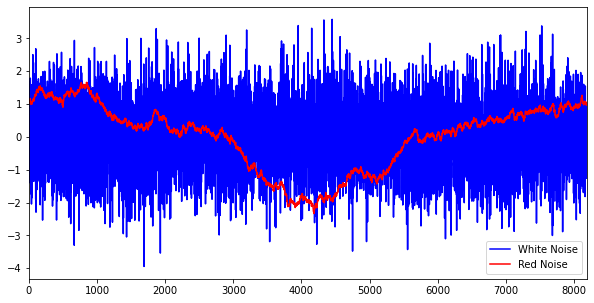

In [4]:
wn = zeta.cNoise(0,[2**13])
rn = zeta.cNoise(2,[2**13])
wn = zeta.normalize(wn)
rn = zeta.normalize(rn)

plt.figure(figsize=(10,5))
plt.plot(wn,label='White Noise',color='blue')
plt.plot(rn,label='Red Noise',color='r')
plt.xlim(0,len(wn))
plt.legend()
plt.show()

# 2. Visualizing Set of Singularity Spectrum

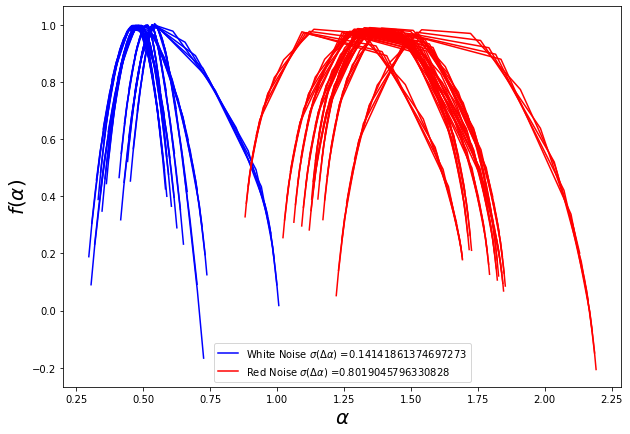

In [6]:
aws, faws, cw  = zeta.autoMFDFA(wn,nsamples=10)
ars, fars, cr  = zeta.autoMFDFA(rn,nsamples=10)

plt.figure(figsize=(10,7))
for i in range(len(aws)):
  if i==0:
    plt.plot(aws[i],faws[i],color='b',label=r"White Noise $\sigma (\Delta \alpha)$ ="+str(cw))
  else:
    plt.plot(aws[i],faws[i],color='b')

for i in range(len(ars)):
  if i==0:
    plt.plot(ars[i],fars[i],color='r',label=r"Red Noise $ \sigma (\Delta \alpha)$ ="+str(cr))
  else:
    plt.plot(ars[i],fars[i],color='r')


plt.xlabel(r"$\alpha$",fontsize=20)
plt.ylabel(r"$f(\alpha)$",fontsize=20)

plt.legend()
plt.show()

# 3. Visualizing Power Spectrum Density

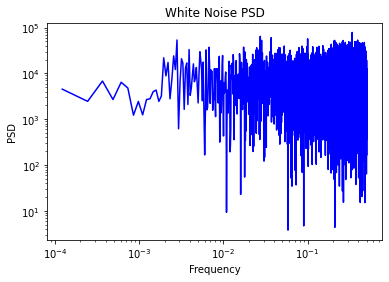

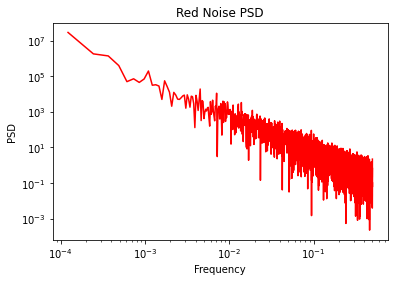

In [7]:
import numpy as np

psdw = np.fft.fft(wn)
psdw = np.real(psdw*np.conj(psdw))
psdr = np.fft.fft(rn)
psdr = np.real(psdr*np.conj(psdr))

freq = np.fft.fftfreq(len(wn))
seq = np.argsort(freq)


psdw = psdw[seq]
psdr = psdr[seq]
freq = freq[seq]
psdw = psdw[freq>0]
psdr = psdr[freq>0]
freq = freq[freq>0]

plt.figure()
plt.title("White Noise PSD")
plt.loglog(freq,psdw,color="b")
plt.xlabel("Frequency")
plt.ylabel("PSD")

plt.figure()
plt.loglog(freq,psdr,color="r")
plt.title("Red Noise PSD")
plt.xlabel("Frequency")
plt.ylabel("PSD")
plt.show()

# 4. $\zeta$ - Space

In [8]:
print("White Noise zeta values:")
print(zeta.zetaSpace(wn,nsamples=10))

White Noise zeta values:
{'ISE': 0.04829623449459253, 'LDA': 0.10069088774628406}


In [9]:
print("Red Noise zeta values:")
print(zeta.zetaSpace(rn,nsamples=10))

Red Noise zeta values:
{'ISE': 0.8494805231730138, 'LDA': 0.8409805565187212}


## 4.1. Multiple samples of colored noise

100%|██████████| 200/200 [10:21<00:00,  3.11s/it]


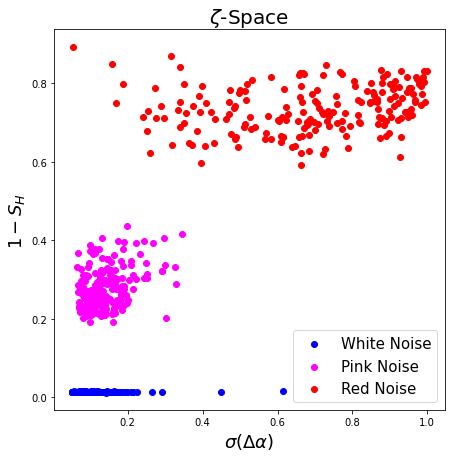

In [10]:
import pandas as pd
import tqdm

sampleSize = 2**13
nsamples = 200
wn,pn,rn = [],[],[]

for i in tqdm.tqdm(range(nsamples)):
  try:
    wn.append(zeta.zetaSpace(zeta.cNoise(0,[sampleSize]),nsamples=10 ) )
  except Exception as e:
    # Threshold should be lower to see any Singularity spectrum, but it should not be a problem in this example
    pass
  try:
    pn.append(zeta.zetaSpace(zeta.cNoise(1,[sampleSize]),nsamples=10 ) )
  except Exception as e:
    # Threshold should be lower to see any Singularity spectrum, but it should not be a problem in this example
    pass
  try:
    rn.append(zeta.zetaSpace(zeta.cNoise(2,[sampleSize]),nsamples=10 ) )
  except Exception as e:
    # Threshold should be lower to see any Singularity spectrum, but it should not be a problem in this example
    pass

wn = pd.DataFrame(wn)
pn = pd.DataFrame(pn)
rn = pd.DataFrame(rn)

plt.figure(figsize=(7,7))
plt.scatter(wn["LDA"],wn["ISE"],color='b',label="White Noise")
plt.scatter(pn["LDA"],pn["ISE"],color='magenta',label="Pink Noise")
plt.scatter(rn["LDA"],rn["ISE"],color='r',label="Red Noise")
plt.xlabel(r"$\sigma(\Delta \alpha)$",fontsize=18)
plt.ylabel(r"$1 - S_H$",fontsize=18)
plt.title(r"$\zeta$-Space",fontsize=20)
plt.legend(fontsize=15)
plt.show()

In [11]:
wn.to_csv("zWhite.csv")
pn.to_csv("zPink.csv")
rn.to_csv("zRed.csv")

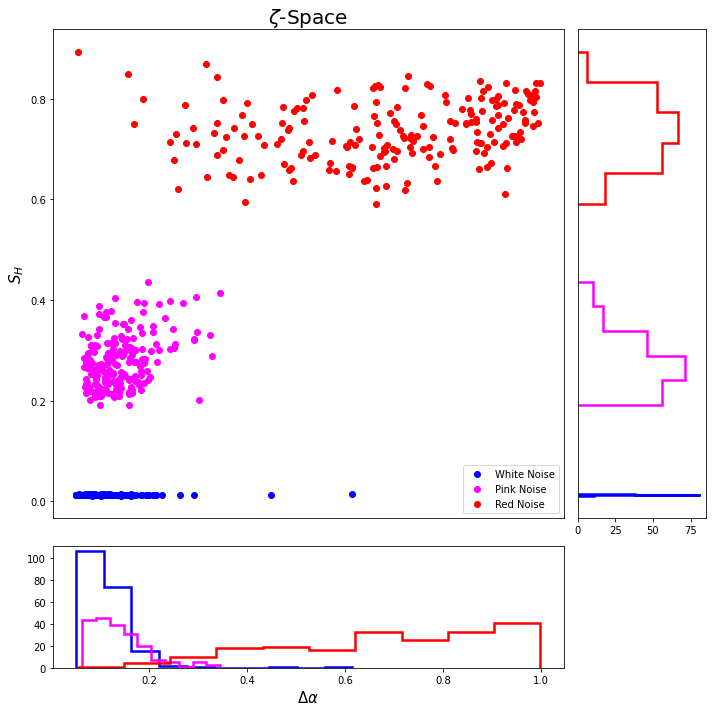

In [13]:
from matplotlib.gridspec import GridSpec
plt.figure(figsize=(10,10))

gs = GridSpec(2, 2, width_ratios=[4, 1], height_ratios=[4, 1])

plt.subplot(gs[0,0])
plt.title(r"$\zeta$-Space",fontsize=20)
plt.scatter(wn["LDA"],wn["ISE"],color='b',label="White Noise")
plt.scatter(pn["LDA"],pn["ISE"],color='magenta',label="Pink Noise")
plt.scatter(rn["LDA"],rn["ISE"],color='r',label="Red Noise")
plt.ylabel("$S_H$",fontsize=15)
plt.xticks([])
plt.legend()

plt.subplot(gs[0,1])
plt.hist(wn['ISE'],color='b',histtype='step',orientation='horizontal',lw=2.5,bins=5)
plt.hist(pn['ISE'],color='magenta',histtype='step',orientation='horizontal',lw=2.5,bins=5)
plt.hist(rn['ISE'],color='r',histtype='step',orientation='horizontal',lw=2.5,bins=5)
plt.yticks([])

plt.subplot(gs[1,0])
plt.hist(wn['LDA'],color='b',histtype='step',lw=2.5)
plt.hist(pn['LDA'],color='magenta',histtype='step',lw=2.5)
plt.hist(rn['LDA'],color='r',histtype='step',lw=2.5)
plt.xlabel(r"$\Delta\alpha$",fontsize=15)

plt.tight_layout()
plt.show()